In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
%matplotlib inline

In [22]:
def get_kernel(sigma):
    def kernel(x0, x1):
        return np.exp(-( (x0[0]-x1[0])**2 + (x0[1]-x1[1])**2 )/(2*sigma**2))
    return kernel

In [23]:
def kpca(train_data, kernel):
    N = len(train_data)
    k0 = np.zeros(shape=(N,N))
    for n0, x0 in enumerate(train_data):
        for n1, x1 in enumerate(train_data):
            k0[n0,n1] = kernel(x0,x1)
    one_n = np.ones(shape=(N,N)) / N
    gram = k0 - one_n.dot(k0) - k0.dot(one_n) + one_n.dot(k0).dot(one_n)
    eigvals, eigvecs = eigh(gram)
    
    def comp(x, i):
        result = 0
        for n in range(N):
            result += eigvecs[n,-i] * kernel(x, train_data[n])

        return result/np.sqrt(eigvals[-i]*N)
    
    return comp



In [24]:
fst=np.random.randn(30,2)+np.array([-0.5,-0.2])
snd=np.random.randn(30,2)+np.array([0.,0.6])
thd=np.random.randn(30,2)+np.array([0.5,0.])
train_data= np.append(np.append(fst,snd,0),thd,0)
comp = kpca(train_data, get_kernel(2.0))

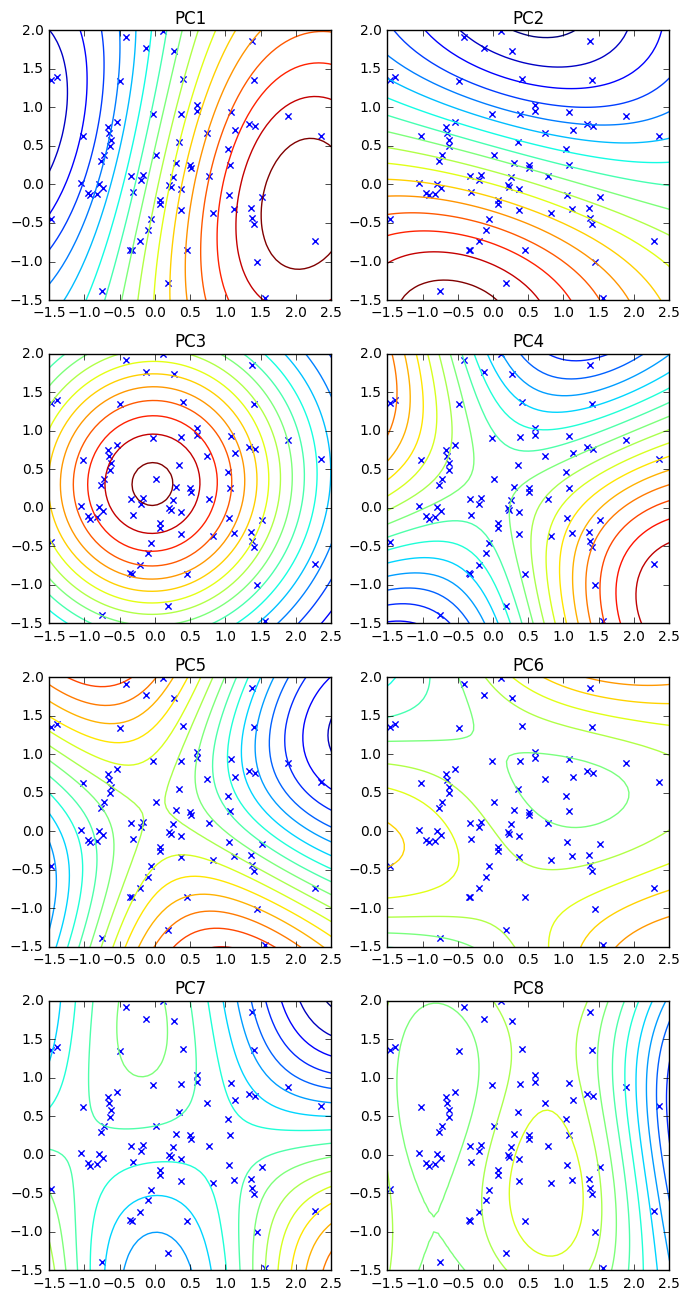

In [25]:
x = np.linspace(-3,3,90)
y = np.linspace(-3,3,90)
X, Y = np.meshgrid(x,y)

fig = plt.figure(figsize=(8,16))
for i in range(1,9):
    subplot = fig.add_subplot(4,2,i)
    subplot.set_xlim(-1.5,2.5)
    subplot.set_ylim(-1.5,2)
    subplot.set_title('PC%d' % i)
    Z = [comp([x,y], i) for (x,y) in zip(X,Y)]
    subplot.contour(X, Y, Z, 20)
    subplot.scatter(train_data[:,0], train_data[:,1], marker='x')